In [1]:
## Libraries
import glob
from multiprocessing import cpu_count
import os
import sys

## 3rd party
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image, ImageFilter
import torch
from torch.utils.data import DataLoader

_path = ".."
if _path not in sys.path:
    sys.path.append(_path)
from lib.dataset import TextArtDataLoader, AlignCollate
from lib.config import Config
# from lib.preprocess import (pad_image, crop_edges_lr, )

%reload_ext autoreload
%autoreload 2

In [63]:
WORD2VEC_MODEL_FILE = "../models/deviant_wiki_word2vec.model"
BATCH_SIZE = 4
# N_WORKERS = cpu_count() - 1
N_WORKERS = 1
CONFIG = Config()

In [85]:
train_dataset = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='train')
val_dataset = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='val')
test_dataset = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='test')
train_align_collate = AlignCollate('train',
                                   CONFIG.MEAN,
                                   CONFIG.STD,
                                   CONFIG.IMAGE_SIZE_HEIGHT,
                                   CONFIG.IMAGE_SIZE_WIDTH,
                                   horizontal_flipping=CONFIG.HORIZONTAL_FLIPPING,
                                   random_rotation=CONFIG.RANDOM_ROTATION,
                                   color_jittering=CONFIG.COLOR_JITTERING,
                                   random_grayscale=CONFIG.RANDOM_GRAYSCALE,
                                   random_channel_swapping=CONFIG.RANDOM_CHANNEL_SWAPPING,
                                   random_gamma=CONFIG.RANDOM_GAMMA,
                                   random_resolution=CONFIG.RANDOM_RESOLUTION)
val_align_collate = AlignCollate('val',
                                   CONFIG.MEAN,
                                   CONFIG.STD,
                                   CONFIG.IMAGE_SIZE_HEIGHT,
                                   CONFIG.IMAGE_SIZE_WIDTH,
                                   horizontal_flipping=CONFIG.HORIZONTAL_FLIPPING,
                                   random_rotation=CONFIG.RANDOM_ROTATION,
                                   color_jittering=CONFIG.COLOR_JITTERING,
                                   random_grayscale=CONFIG.RANDOM_GRAYSCALE,
                                   random_channel_swapping=CONFIG.RANDOM_CHANNEL_SWAPPING,
                                   random_gamma=CONFIG.RANDOM_GAMMA,
                                   random_resolution=CONFIG.RANDOM_RESOLUTION)

train_loader = DataLoader(train_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=train_align_collate,
                         )
val_loader = DataLoader(val_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=val_align_collate,
                         )
test_loader = DataLoader(test_dataset,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=None,
                         )

In [15]:
len(train_dataset)

63832

In [16]:
train_dataset2 = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='train')
val_dataset2 = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='val')
test_dataset2 = TextArtDataLoader('united', WORD2VEC_MODEL_FILE, mode='test')
train_align_collate2 = AlignCollate('train',
                                   CONFIG.MEAN,
                                   CONFIG.STD,
                                   CONFIG.IMAGE_SIZE_HEIGHT,
                                   CONFIG.IMAGE_SIZE_WIDTH,
                                   horizontal_flipping=CONFIG.HORIZONTAL_FLIPPING,
                                   random_rotation=CONFIG.RANDOM_ROTATION,
                                   color_jittering=CONFIG.COLOR_JITTERING,
                                   random_grayscale=CONFIG.RANDOM_GRAYSCALE,
                                   random_channel_swapping=CONFIG.RANDOM_CHANNEL_SWAPPING,
                                   random_gamma=CONFIG.RANDOM_GAMMA,
                                   random_resolution=CONFIG.RANDOM_RESOLUTION)
val_align_collate2 = AlignCollate('val',
                                   CONFIG.MEAN,
                                   CONFIG.STD,
                                   CONFIG.IMAGE_SIZE_HEIGHT,
                                   CONFIG.IMAGE_SIZE_WIDTH,
                                   horizontal_flipping=CONFIG.HORIZONTAL_FLIPPING,
                                   random_rotation=CONFIG.RANDOM_ROTATION,
                                   color_jittering=CONFIG.COLOR_JITTERING,
                                   random_grayscale=CONFIG.RANDOM_GRAYSCALE,
                                   random_channel_swapping=CONFIG.RANDOM_CHANNEL_SWAPPING,
                                   random_gamma=CONFIG.RANDOM_GAMMA,
                                   random_resolution=CONFIG.RANDOM_RESOLUTION)

train_loader2 = DataLoader(train_dataset2,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=train_align_collate2,
                         )
val_loader2 = DataLoader(val_dataset2,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=val_align_collate2,
                         )
test_loader2 = DataLoader(test_dataset2,
                          batch_size=BATCH_SIZE,
                          shuffle=True,
                          num_workers=N_WORKERS,
                          pin_memory=True,
                          collate_fn=None,
                         )

In [17]:
np.all(train_dataset.image_files == train_dataset2.image_files)

True

In [18]:
np.all(val_dataset.image_files == val_dataset2.image_files)

True

In [19]:
np.all(test_dataset.image_files == test_dataset2.image_files)

True

In [105]:
# for image, label, image_file in train_loader:
# for label_sentence, image_file in train_loader:
for image, word_vectors_tensor in train_loader:
#     print(label_sentence, image_file)
    print("IMAGE:", image.shape)
    print("WV:", word_vectors_tensor.shape)
    break

IMAGE: torch.Size([4, 3, 653, 665])
WV: torch.Size([4, 8, 2000])


In [106]:
img = np.array(image)[1].transpose(1, 2, 0)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


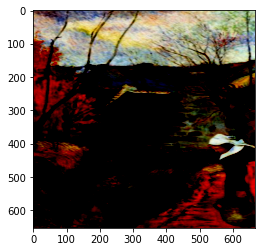

In [107]:
plt.imshow(img)

In [108]:
img

array([[[ 0.39607847,  0.32549024,  0.39607847],
        [ 0.38823533,  0.3176471 ,  0.3803922 ],
        [ 0.3803922 ,  0.30980396,  0.35686278],
        ...,
        [ 0.78039217,  0.84313726,  0.70980394],
        [ 0.77254903,  0.8352941 ,  0.69411767],
        [ 0.77254903,  0.827451  ,  0.6862745 ]],

       [[ 0.41176474,  0.33333337,  0.4039216 ],
        [ 0.4039216 ,  0.32549024,  0.38823533],
        [ 0.39607847,  0.30980396,  0.36470592],
        ...,
        [ 0.81960785,  0.88235295,  0.7490196 ],
        [ 0.8117647 ,  0.8745098 ,  0.73333335],
        [ 0.8039216 ,  0.8666667 ,  0.7254902 ]],

       [[ 0.41176474,  0.32549024,  0.38823533],
        [ 0.4039216 ,  0.3176471 ,  0.37254906],
        [ 0.38823533,  0.2941177 ,  0.34901965],
        ...,
        [ 0.8117647 ,  0.8901961 ,  0.7490196 ],
        [ 0.8039216 ,  0.88235295,  0.7411765 ],
        [ 0.79607844,  0.8745098 ,  0.73333335]],

       ...,

       [[ 0.02745104, -0.41960782, -0.7490196 ],
        [ 0

In [ ]:
a = torch.Tensor([[-8, -9, -1], 
                  [-1, 2, -7]])
b = torch.Tensor([[-8, -9, -1], 
                  [-1, 2, -7],
                  [1, 2, 7],
                  [-3, 2, 2],
                  [5, 5, 3]])

In [ ]:
a

In [ ]:
b

In [ ]:
torch.Tensor(np.pad(b, ((0, len(b) - len(b)), (0, 0))))